In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import os
import pymysql
import numpy as np
import seaborn as sns

In [2]:
host = os.getenv('Local')

In [57]:
conn= pymysql.connect(
    host='localhost',
    user='root',
    passwd='sinduja123', # Put your password in this place
    db='VitalSign_HealthManager', charset='utf8mb4')

In [58]:
patients = pd.read_sql('select * from Patients', conn)
doctor = pd.read_sql('select * from Doctor', conn)
staff = pd.read_sql('select * from Staff', conn)
treatmentplan = pd.read_sql('select * from TreatmentPlan', conn)
medication = pd.read_sql('select * from Medication', conn)
department = pd.read_sql('select * from Department', conn)
doc_med = pd.read_sql('select * from Doctor_Medication', conn)
tp_patient = pd.read_sql('select * from TreatmentPlan_Patient', conn)
appointment = pd.read_sql('select * from Appointment', conn)
ap_visits = pd.read_sql('select * from Patient_Visits', conn)
doc_general = pd.read_sql('select * from General', conn)
medicalrecord = pd.read_sql('select * from MedicalRecord', conn)
pat_med = pd.read_sql('select * from Patient_Medication', conn)
doc_researcher = pd.read_sql('select * from Researcher', conn)
researchproject = pd.read_sql('select * from ResearchProject', conn)
researchpublication = pd.read_sql('select * from ResearchPublication', conn)
rp_author = pd.read_sql('select * from ResearchPublication_Authors', conn)
researchteam = pd.read_sql('select * from ResearchTeam', conn)
doc_surgeon = pd.read_sql('select * from Surgeon', conn)
tp_doc = pd.read_sql('select * from TreatmentPlan_Doctor', conn)
ward = pd.read_sql('select * from Ward', conn)

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2328/1699521111.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  patients = pd.read_sql('select * from Patients', conn)
/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2328/1699521111.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  doctor = pd.read_sql('select * from Doctor', conn)
/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2328/1699521111.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  staff = pd.read_sql('select * from Staff',

Query - 1

What is the  age distribution of patients visiting the hospital?

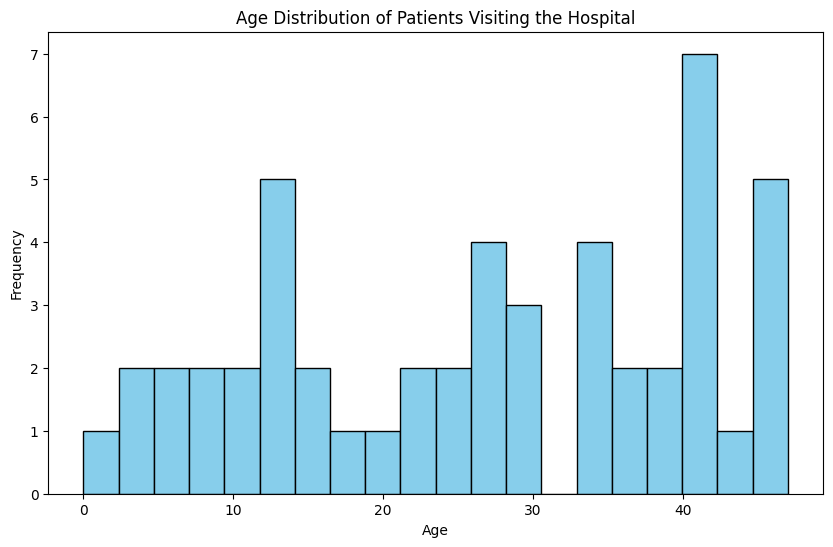

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(patients['P_Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Patients Visiting the Hospital')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Query 2

Is there a correlation between patient age and treatment duration?

In [7]:
treatmentplan['duration'] = treatmentplan['End_Date'] - treatmentplan['Start_Date']
tp_data = pd.merge(treatmentplan, tp_patient, on = 'Tp_Id', how = 'inner')

In [8]:
patients = patients.rename(columns={'P_id': 'P_Id'})
merged_data = pd.merge(patients, tp_data, on='P_Id', how='inner')

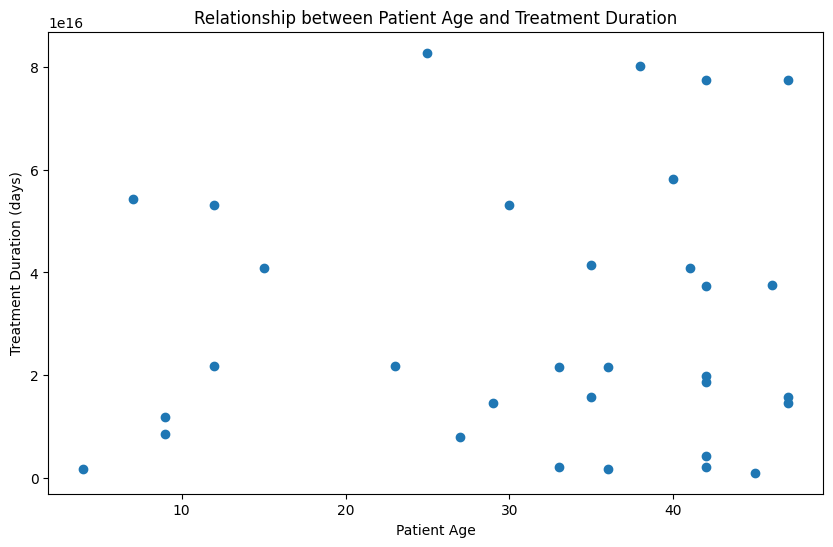

In [9]:
# Create a scatter plot to visualize the relationship between patient age and treatment duration
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['P_Age'], merged_data['duration'])
plt.title('Relationship between Patient Age and Treatment Duration')
plt.xlabel('Patient Age')
plt.ylabel('Treatment Duration (days)')
plt.show()

Query 3

Which doctor has the highest number of appointments, and how does their appointment load compare to other doctors?

In [10]:
doctor_appointment_count = ap_visits['D_Id'].value_counts().reset_index()
doctor_appointment_count.columns = ['D_Id', 'AppointmentCount']

In [11]:
# Merge with the Doctor table to get doctor names
doctor_appointment_count = pd.merge(doctor_appointment_count, doctor, on='D_Id', how='inner', suffixes=('_left', '_right'))

# Sort the data by appointment count in descending order
doctor_appointment_count = doctor_appointment_count.sort_values(by='AppointmentCount', ascending=False)

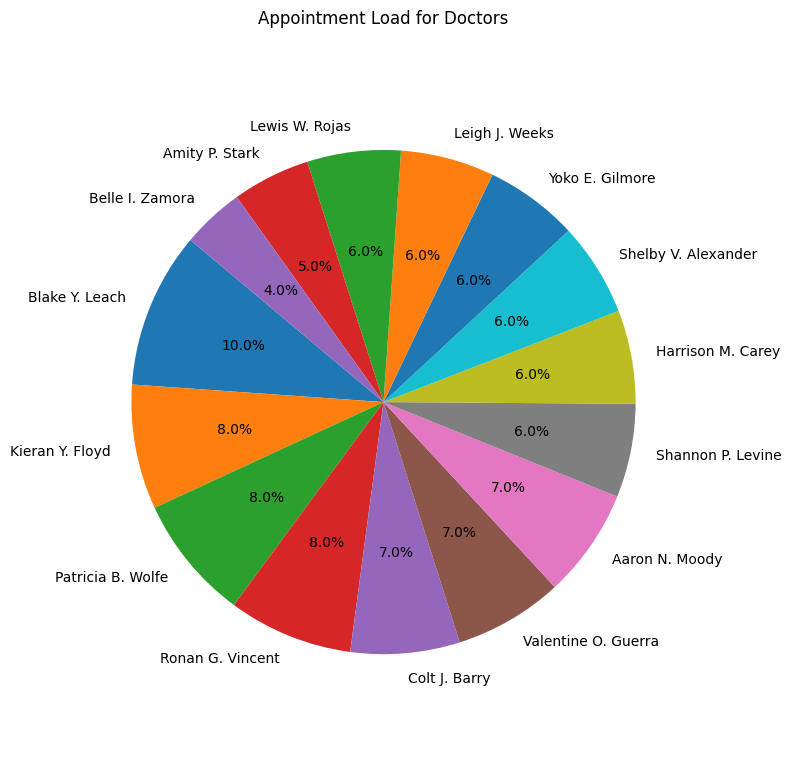

In [76]:
plt.figure(figsize=(8, 8))
plt.pie(doctor_appointment_count['AppointmentCount'], labels=doctor_appointment_count['D_Name'], autopct='%1.1f%%', startangle=140)
plt.title('Appointment Load for Doctors')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Query 4

Visualize the average age of patients by department with a heatmap

/var/folders/zk/gt6dlj713295ct5gwkvq9pp40000gn/T/ipykernel_2328/3001039681.py:6: FutureWarning: The provided callable <function mean at 0x114bb47c0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = pd.pivot_table(merged_df, values='P_Age', index='P_Name', columns='Dept_Id', aggfunc=np.mean)


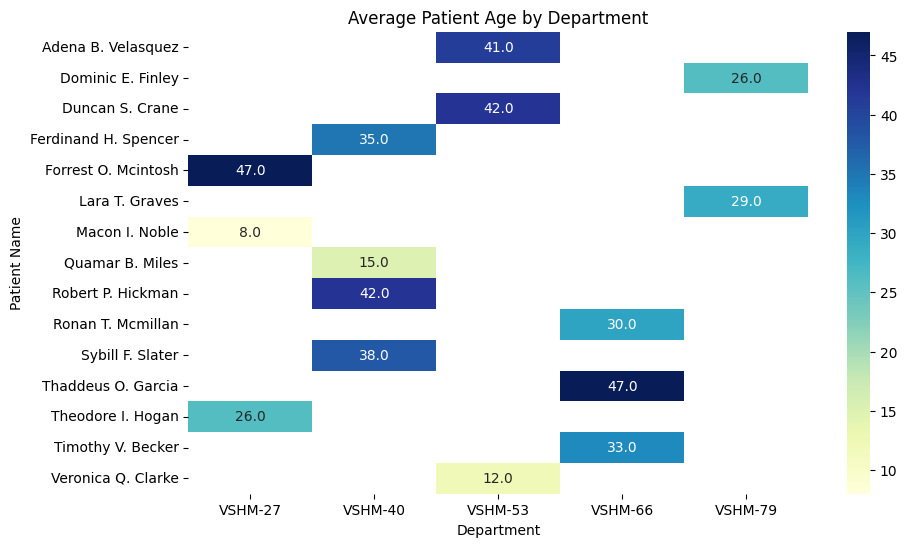

In [17]:
df_patient = pd.DataFrame(patients) 
df_ward = pd.DataFrame(ward) 
# Merge patient and ward data on W_Id 
merged_df = pd.merge(df_patient, df_ward, on='W_Id') 
# Create a pivot table to summarize the data 
pivot_table = pd.pivot_table(merged_df, values='P_Age', index='P_Name', columns='Dept_Id', aggfunc=np.mean) 
# Create a heatmap 
plt.figure(figsize=(10, 6)) 

sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f") 

plt.title('Average Patient Age by Department') 

plt.xlabel('Department') 

plt.ylabel('Patient Name') 

plt.show() 

Query 5

What can we say about the distribution of staff in different positions? 

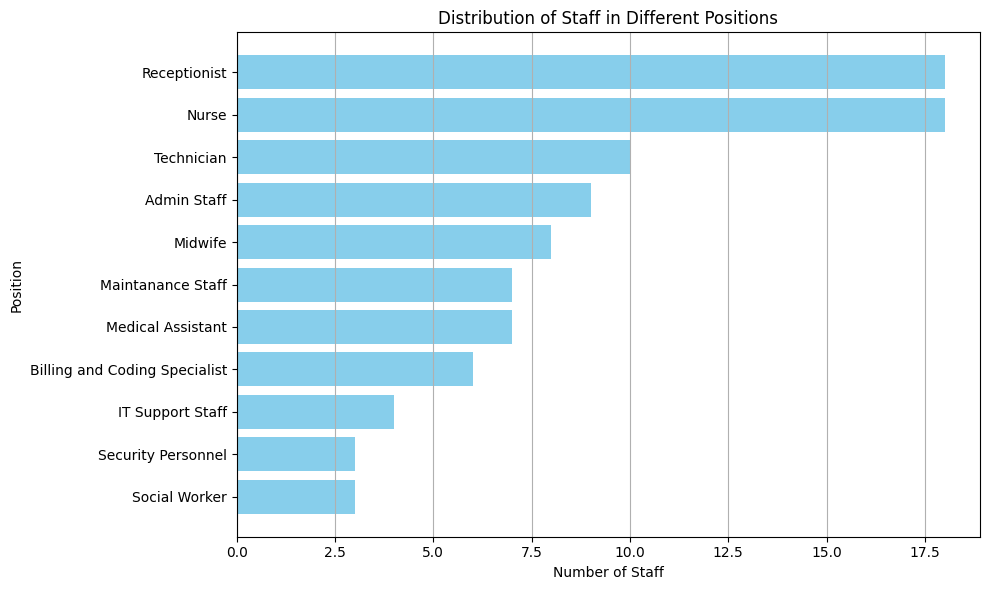

In [60]:
# Count the number of staff in each position
staff_position_count = staff['St_Position'].value_counts().reset_index()
staff_position_count.columns = ['Position', 'Count']

# Sort the data by count in descending order
staff_position_count = staff_position_count.sort_values(by='Count', ascending=True)

# Create a horizontal bar plot to visualize the distribution of staff positions
plt.figure(figsize=(10, 6))
plt.barh(staff_position_count['Position'], staff_position_count['Count'], color='skyblue')
plt.title('Distribution of Staff in Different Positions')
plt.xlabel('Number of Staff')
plt.ylabel('Position')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


Query 6

What is the most commonly prescribed medication (Most popular medication that is prescribed to the patients by the doctors)

In [79]:
cursor = conn.cursor()
query = """  
SELECT D_Id, count(*) as prescription_count
FROM Doctor_Medication
GROUP BY D_Id
ORDER BY D_Id 
"""  
cursor.execute(query)  
result = cursor.fetchall()  
# Convert result to DataFrame  
df = pd.DataFrame(result, columns=['D_Id', 'prescription_count'])


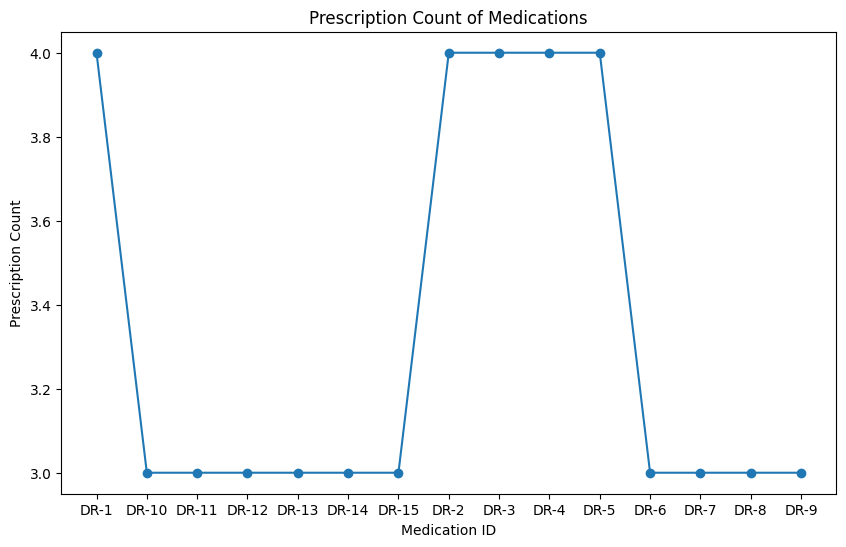

In [82]:
# Plotting the line graph 
plt.figure(figsize=(10, 6))  
plt.plot(df['D_Id'], df['prescription_count'], marker='o', linestyle='-')  

plt.title('Prescription Count of Medications')  

plt.xlabel('Medication ID')  
plt.ylabel('Prescription Count')  
plt.show() 